# Part 1 - Exploratory Data Analysis

In [1]:
import pandas as pd
from pandas import DataFrame
import json
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import pyplot

In [2]:
#Read in JSON file
with open('C:/Users/hfallah/Downloads/1481053515_ultimate_challenge/ultimate_challenge/logins.json') as json_file:  
    logins = json.load(json_file)

In [3]:
#Group daya by 15 mins
logins_2 = logins['login_time']

date = [datetime.strptime(x, "%Y-%m-%d %H:%M:%S")for x in logins_2 ]
date2= pd.DataFrame(data = date, columns=['timestamp']).set_index('timestamp')
date2['timestamp']=date2.index

date_sum_timestamps = date2.resample('15Min').count()

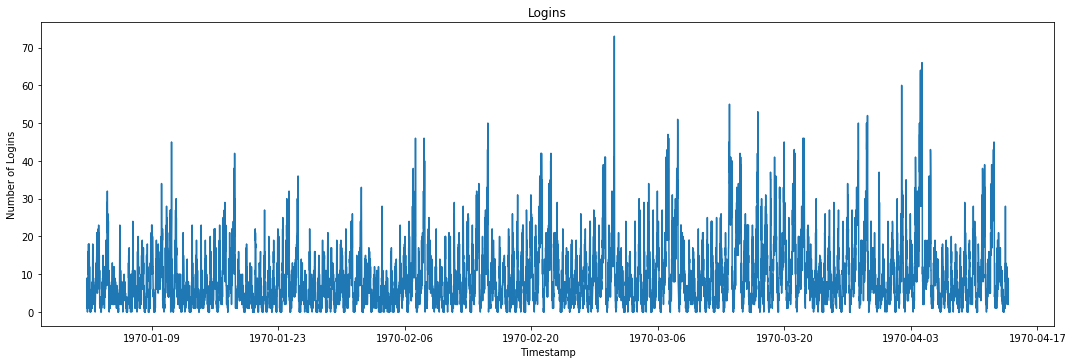

In [11]:
#Plot time series
fig, ax = plt.subplots(figsize = (15,5))
plt.xlabel('Timestamp')
plt.ylabel('Number of Logins')
plt.tight_layout()
plt.title('Logins')

timeseries_plot = plt.plot(date_sum_timestamps.index, date_sum_timestamps.timestamp)
plt.show()

In [8]:
#Daily cycles
by_day = date_sum_timestamps.timestamp.groupby(date_sum_timestamps.index.hour).mean()

#Weekly cycles
by_week = date_sum_timestamps.timestamp.groupby(date_sum_timestamps.index.weekday_name).mean()

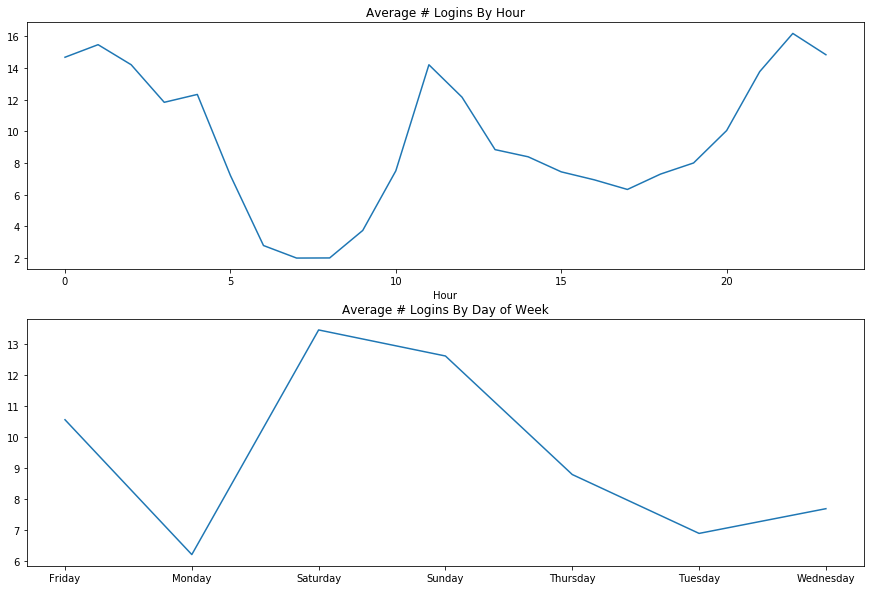

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(by_day)
plt.title('Average # Logins By Hour')
day = plt.xlabel('Hour')
plt.subplot(2,1,2)
plt.plot(by_week)
week = plt.title('Average # Logins By Day of Week')
plt.show()

Saturday clearly has the greatest average number of logins throughout the week, followed by Sunday. Monday seems to have the lowest average number of logins per week. The greatest number of logins occur between midnight and 1am, as well as 11am, where the lowest number of logins occurs at around 7am.

# Part 2 - Experiment and Metrics Design

1. A key measure of success is if the cities benefit financially from allowing people visit from each city. Since the two cities are different in the sense that Gotham is active at night, and Metropolis is active in the day, there is less of a likelyhood of competition of business between the two cities. Therefore, allowing more travel between the two cities may increase revenue in each city. Success would indicate that the additional revenue from increased traffic would be greater than the costs to offset the toll fees.

2. An experiment that can be done to measure the success of this trial would involve doing a t-test between the increased costs compared to revenue for the cities. This can be done by comparing the mean net income before the toll fees were waived (consisting of income from toll fees) compared to the mean net income after waiving the fees (consisting of increased tourism revenue minus costs of toll fee). Depending on the outcome of the t-test, if the mean net income is not statistically different between the pre and post fee waive at 95% confidence, then the reccomendation would be to not proceed with waiving toll fees.

# Part 3 - Predictive Modeling

In [102]:
#Read in JSON file
with open('C:/Users/hfallah/Downloads/1481053515_ultimate_challenge/ultimate_challenge/ultimate_data_challenge.json') as json_file:  
    data = json.load(json_file)

data = pd.DataFrame(data)
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [103]:
#Data cleaning. Check completeness of data.

data.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [104]:
#Variables with missing values:
    #avg_rating_by_driver - use average
    #avg_rating_of_driver - use average

data.avg_rating_by_driver = data.avg_rating_by_driver.fillna(data.avg_rating_by_driver).mean()
data.avg_rating_of_driver = data.avg_rating_of_driver.fillna(data.avg_rating_of_driver).mean()

In [105]:
#Check other variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [106]:
#Look at phone
data.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [107]:
#Iphone can be used as missing value for phone.
data.phone = data.phone.fillna('iPhone')

In [108]:
#Formatting variables. Change dates to date formats:
    #last_trip_date
    #signup_date
    
data.last_trip_date = pd.to_datetime(data.last_trip_date)
data.signup_date = pd.to_datetime(data.signup_date)

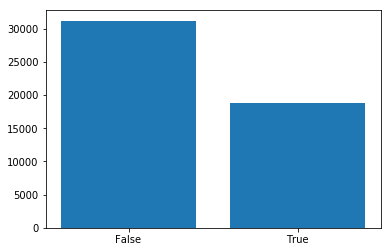

In [109]:
#Create retention variable
data['retained'] =  data.last_trip_date >= '2014-06-01 00:00:00'

#Retained counts
ret = list(data.retained.value_counts().index)
ret_counts = list(data.retained.value_counts())
plt.bar(ret, ret_counts, align='center')
plt.xticks(ret, ('False', 'True'))
plt.show()

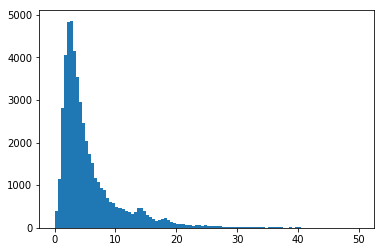

In [110]:
#Lets look at variables in more detail.
#avg_distance
abg_dist_hist = plt.hist(data.avg_dist, bins=100, range=(0,50))
plt.show()

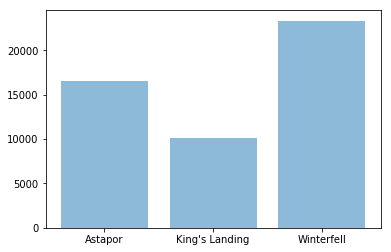

In [111]:
#City
cities = list(data.city.value_counts().index)
city_counts = list(data.city.value_counts())
plt.bar(cities, city_counts, align='center', alpha=0.5)
plt.show()

In [112]:
data.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

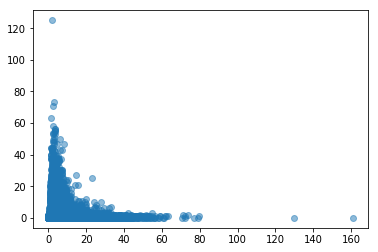

In [113]:
#Relationship of Avg Distance & Trips in 30 days
plt.scatter(data.avg_dist, data.trips_in_first_30_days, alpha=0.5)
plt.show()

In [114]:
#Preprocessing
#Change city, phone, ultimate_black_user to categorical variable
data = data.drop(['last_trip_date', 'signup_date'], axis = 1)
data = pd.get_dummies(data, columns = ['city', 'phone', 'ultimate_black_user'])
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,3.67,4.778158,4.601559,1.10,15.4,4,46.2,True,0,1,0,0,1,0,1
1,8.26,4.778158,4.601559,1.00,0.0,0,50.0,False,1,0,0,1,0,1,0
2,0.77,4.778158,4.601559,1.00,0.0,3,100.0,False,1,0,0,0,1,1,0
3,2.36,4.778158,4.601559,1.14,20.0,9,80.0,True,0,1,0,0,1,0,1
4,3.13,4.778158,4.601559,1.19,11.8,14,82.4,False,0,0,1,1,0,1,0


In [115]:
#Looking back at:

data.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
count,50000.000000,5.000000e+04,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000
mean,5.796827,4.778158e+00,4.601559e+00,1.074764,8.849536,2.278200,60.926084,0.330680,0.202600,0.466720,0.300440,0.699560,0.62292,0.37708
std,5.707357,3.250766e-12,8.473307e-13,0.222336,19.958811,3.792684,37.081503,0.470463,0.401941,0.498896,0.458454,0.458454,0.48466,0.48466
min,0.000000,4.778158e+00,4.601559e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,2.420000,4.778158e+00,4.601559e+00,1.000000,0.000000,0.000000,33.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
50%,3.880000,4.778158e+00,4.601559e+00,1.000000,0.000000,1.000000,66.700000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.00000
75%,6.940000,4.778158e+00,4.601559e+00,1.050000,8.600000,3.000000,100.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.00000
max,160.960000,4.778158e+00,4.601559e+00,8.000000,100.000000,125.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000


In [ ]:
#variables that have outliers:
    #avg_dist, avg_surge, surge_pct, trips_in_first_30_days

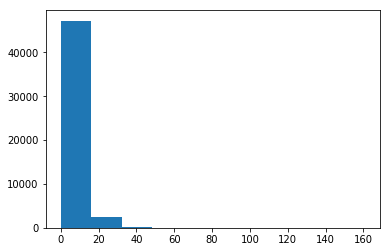

In [117]:
plt.hist(data.avg_dist)
plt.show()

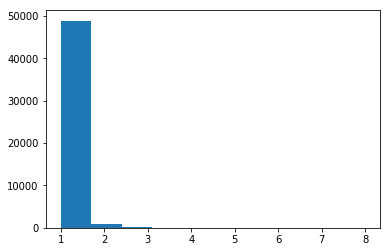

In [118]:
plt.hist(data.avg_surge)
plt.show()

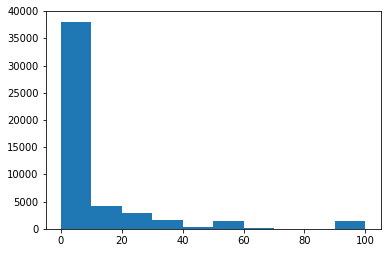

In [119]:
plt.hist(data.surge_pct)
plt.show()

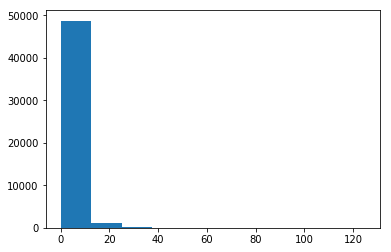

In [120]:
plt.hist(data.trips_in_first_30_days)
plt.show()

In [122]:
#standardize these 4 variables
from sklearn import preprocessing

# create scaler
scaler = preprocessing.StandardScaler()

# select columns to scale
columns = ['avg_dist', 'avg_surge', 'surge_pct', 'trips_in_first_30_days']

# transform numeric stats
data[columns] = scaler.fit_transform(data[columns])
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,-0.372650,4.778158,4.601559,0.113506,0.328202,0.453984,46.2,True,0,1,0,0,1,0,1
1,0.431583,4.778158,4.601559,-0.336268,-0.443394,-0.600689,50.0,False,1,0,0,1,0,1,0
2,-0.880771,4.778158,4.601559,-0.336268,-0.443394,0.190316,100.0,False,1,0,0,0,1,1,0
3,-0.602181,4.778158,4.601559,0.293416,0.558679,1.772325,80.0,True,0,1,0,0,1,0,1
4,-0.467266,4.778158,4.601559,0.518303,0.147829,3.090665,82.4,False,0,0,1,1,0,1,0


In [123]:
#Models
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [124]:
label = data.retained
data = data.drop(['retained'], axis=1)

#Train test split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = .3)

Best: 0.714257 using {'max_iter': 110, 'dual': False, 'C': 3.0}
Final Accuracy: 0.718466666667
             precision    recall  f1-score   support

      False     0.7385    0.8535    0.7919      9412
       True     0.6655    0.4911    0.5651      5588

avg / total     0.7113    0.7185    0.7074     15000



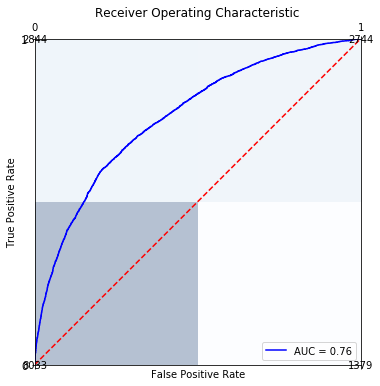

In [130]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

lr = LogisticRegression(penalty='l2')
dual=[True,False]
max_iter=[90,100,110,120,130,140]
C = [1.0,1.5,2.0,2.5,3.0,3.5,4.0,5.0]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)
random = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, cv = 3, n_jobs=-1)


random_result = random.fit(X_train, y_train)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))



final_model = LogisticRegression(C=2.0, max_iter=110, dual=False)
final_model.fit(X_train, y_train)
print ("Final Accuracy: %s" 
       % accuracy_score(y_test, final_model.predict(X_test)))


#Precision Recall
print(classification_report(y_test, final_model.predict(X_test), digits=4))

# Compute ROC curve 
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = final_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Best: 0.773829 using {'n_estimators': 130, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
Final Accuracy: 0.773666666667
             precision    recall  f1-score   support

      False     0.8011    0.8505    0.8250      9412
       True     0.7190    0.6442    0.6796      5588

avg / total     0.7705    0.7737    0.7708     15000



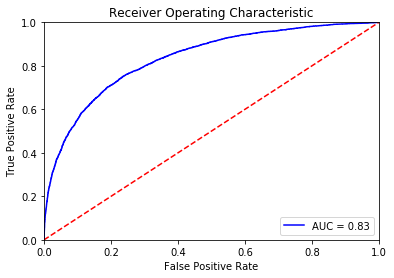

In [136]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
max_depth=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]
min_samples_leaf = [1, 2, 4]
min_samples_split = [2, 5, 10]
n_estimators = [130, 180, 230]
param_grid = dict(max_depth=max_depth, min_samples_leaf=min_samples_leaf,
                  min_samples_split=min_samples_split,n_estimators=n_estimators)
random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv = 3, n_jobs=-1)


random_result = random.fit(X_train, y_train)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))



final_model = RandomForestClassifier(n_estimators=230, min_samples_split=10, min_samples_leaf=4, max_depth=20)
final_model.fit(X_train, y_train)
print ("Final Accuracy: %s" 
       % accuracy_score(y_test, final_model.predict(X_test)))


#Precision Recall
print(classification_report(y_test, final_model.predict(X_test), digits=4))

# Compute ROC curve 
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = final_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

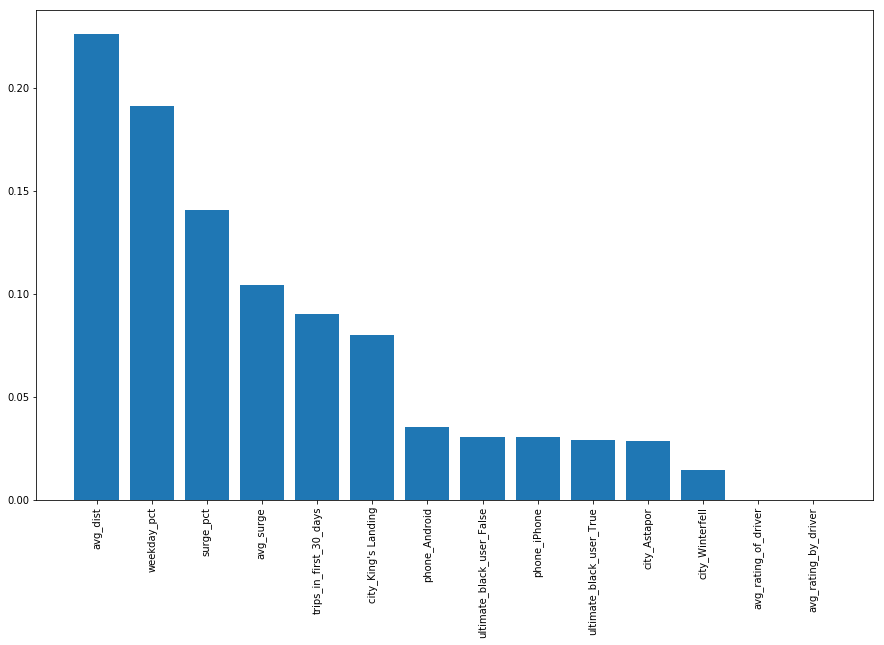

In [142]:
#Key features
# calculate feature importances
features = final_model.feature_importances_

# sort feature importances in descending order
key_feat = np.argsort(features)[::-1]

# rearrange feature names so they match the sorted feature importances
key_feat_ = [X_test.columns[i] for i in key_feat]

plt.figure(figsize = (15, 9))
plt.bar(range(X_test.shape[1]), features[key_feat])
plot = plt.xticks(range(X_test.shape[1]), key_feat_, rotation = 90)
plt.show()

In comparing both the logistic regression model and the random forest, it is clear that the random forest performs better in many performance metrics including accuracy, precicion, recall, f1, and AUC.

Using insights from the model, we can look at the features that have the most predictive power, and we see that avg_dist, weekday_pct, surge_pct are the top predictors in the model. This makes sense because those who have travelled more miles in distance are more likely to have taken a trip within the last 30 days. This information is useful in understanding which customers may be active.